In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Nonlinear Systems of Equations

These are problems of the form:

+ $f_1(x_1, x_2, \ldots, x_n) = 0$
+ $f_2(x_1, x_2, \ldots, x_n) = 0$
+ $\vdots$
+ $f_m(x_1, x_2, \ldots, x_n) = 0$

where $f_1, f_2, \ldots, f_m$ are nonlinear functions. One important method to solve this systems is to consider fixed-point iteration for this wee need the following definitions.

**Definition (Fixed Point):** For $\Phi: D \subset \R^n \to \R^n$, a point $x \in D$ is a fixed point of $\Phi$ if $\Phi(x) = x$.

**Definition (Lipschitz Continuity):** A function $\Phi: D \subset \R^n \to \R^n$ is Lipschitz continuous on $D$ if there exists a constant $L \geq 0$ such that for all $x, y \in D$,
$$\|\Phi(x) - \Phi(y)\| \leq L \|x - y\|.$$
The smallest such $L$ is called the Lipschitz constant of $\Phi$.

**Theorem (Banach Fixed-Point Theorem):** Let $D$ be a closed subset of $\R^n$  and $\Phi: D \to \R^n$ be a function with:

+ $\Phi(D) \subseteq D$ (i.e., $\Phi$ maps $D$ into itself),
+ $\Phi$ is Lipschitz continuous on $D$ with Lipschitz constant $L < 1$. (Contraction condition)

THen $\Phi$ has one unique Fixed Point $a \in D$ with an iteration given by $x^{k+1} = \Phi(x^k)$ for any starting point $x^0 \in D$. We have the following error estimates:

$$||x^k - a|| \leq \frac{L}{1-L} ||x^k - x^{k-1}||$$

## Important Remarks and Theorems

**Theorem (local result):** If $a \in \R^n$ is a fixed-point of $\Phi$, $\Phi(a) = a$ and $\Phi$ is twice continiously differentiable in the neighborhood of $a$ then we have for the error $e^{k} = x^k - a$ the recursion:

$$e^{k+1} = \Phi'(a) e^k + O(||e^k||^2)$$

**Definition (Spectral Radius):** For a $n \times n$ matrix $A$ the spectral radius is the number $\rho(A) = \max \{|\lambda|: \lambda \text{ is an eigenvalue of } A\}$.

+ If $\rho(\Phi'(a)) < 1$ then $a$ then the fixed-point is locally unique and the iteration converges locally linearly.
+ If $\rho(\Phi'(a)) > 1$ then the fixed-point is not locally unique and the iteration diverges.

### Speed of Convergence

Given the iteration and the contraction property of $\Phi$ we have:

$$||x^{k+1} - a|| = ||\Phi(x^k) - \Phi(a)|| \leq L ||x^k - a|| \leq L^{k+1} ||x^0 - a||$$

which tells us that at each iteration we win about a factor $1/L$ in accuracy. For the error we get the estimate $||e^{k}|| \approx l \cdot \log L + \log ||e^0||$. Which means that we have linear convergence with rate $L$.

### Stopping the Iteration

If $\Phi$ is a contraction and $a$ is a fixed-point we want to stop the Iteration if $||x^k - a|| \leq tol$. Here $tol$ is given tolerance by the user. Since we now the error estimate by the Banach-Theorem :

$$||x^k - a|| \leq \frac{L}{1-L} ||x^k - x^{k-1}||$$

we can estimate the lipschitz-constant $L$ at each iteration via $L_k = \frac{||x^k - x^{k-1}||}{||x^{k-1} - x^{k-2}||}$ and stop the iteration if

$$\frac{\beta_k}{1-\beta_k} ||x^k - x^{k-1}|| \leq tol$$

where where $\beta$ is given by the geometric mean of the last $m$ estimates of $L$:


**Theorem** If $\Phi \in C^{p+1}(\R)$ is a contraction with fixed-point $x^*$ and $\Phi^{(j)}(x^*) = 0$ for $1 \leq j \leq p$ and $\Phi^{(p+1)}(x^*) \neq 0$ then the fixed-point iteration has  Order $p+1$ and 

$$\lim_{k \to \infty} \frac{||x^{k+1} - x^*||}{||x^k - x^*||^{p+1}} = \frac{|\Phi^{(p+1)}(x^*)|}{(p+1)!}$$

Root found using g1: 0.0
Root found using g2: 0.6823277943388553


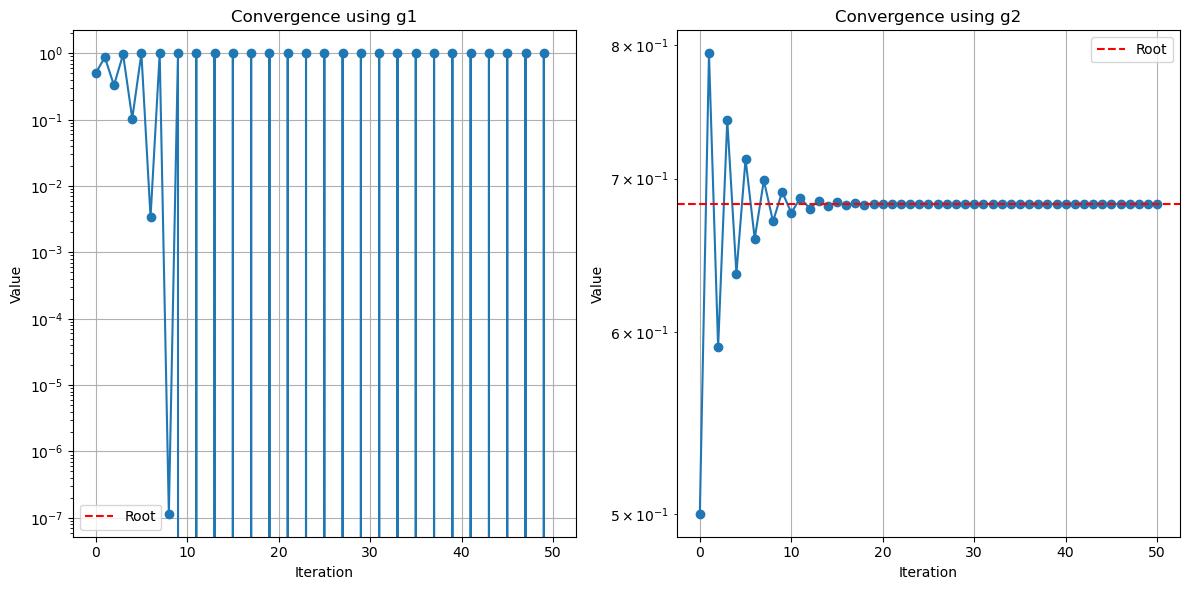

In [12]:
def fixed_point_iteration(g,x0,tol=1e-10,max_iter=100):
    """ 
    Function that performs the fixed point iteration and returns the approximate solution.
    """
    x = x0
    xs = [x0] # Store the iterates for plotting
    for i in range(max_iter):
        x_new = g(x)
        xs.append(x_new)
        if abs(x_new - x) < tol:
            return x_new, xs
        x = x_new

    return x, xs

# We want to find the roots of x^3 + x -1 = 0
# Rearranging gives us the following fixed point functions:
g1 = lambda x: 1 - x**3
g2 = lambda x: (1-x)**(1/3)

# Initial guess
x = 0.5

# Perform fixed point iteration
root1, iterates1 = fixed_point_iteration(g1, x, max_iter=50)
root2, iterates2 = fixed_point_iteration(g2, x, max_iter=50)

print(f"Root found using g1: {root1}")
print(f"Root found using g2: {root2}")

# Plotting the convergence
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(iterates1, marker='o')
plt.title('Convergence using g1')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.yscale('log')
plt.grid() 
plt.axhline(y=root1, color='r', linestyle='--', label='Root')
plt.legend()   
plt.subplot(1, 2, 2)
plt.plot(iterates2, marker='o')
plt.title('Convergence using g2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.yscale('log')
plt.grid()
plt.axhline(y=root2, color='r', linestyle='--', label='Root')
plt.legend()   
plt.tight_layout()
plt.show()

# Newton's Method

The Newton's method is one of the most important methods to find roots of nonlinear systems of equations. For this we consider $f(x)=0$ and want that the functions $f$ are smooth enough. The Jacobian here is given by:

$f'(x) = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \ldots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \ldots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \ldots & \frac{\partial f_m}{\partial x_n} \end{pmatrix}$

**Theorem (Inverse Functions):** Given $D \subset \R^n$ open anf $f: D \to \R^n$ continiously differentiable and $x^* \in D$ with $f(x^*) = 0$ und $\det f'(x^*) \neq 0$. Then the function $f$ can for $x$ near $x^*$ be inverted, there exists $g = f^{-1}$ with $g(0) = x^*$ and $g'(0) = (f'(x^*))^{-1}$.

Only locally unique roots can be found with numerical methods

## Newton's Method Algorithm

The algorithm here is given by:

1. Choose $x^{(0)} \in D$
2. $\Delta x^{(k)}$ is the increment and solution of the linear system $f'(x^{(k)}) \Delta x^{(k)} = -f(x^{(k)})$
3. Update $x^{(k+1)} = x^{(k)} + \Delta x^{(k)}$
4. Stop if $||f(x^{(k)})|| \leq tol$ or $||\Delta x^{(k)}|| \leq tol$ otherwise go to step 2.

**Theorem (Local Quadratic Convergence):** Let the function $f$ in a neighborhood of a root $x^*$ be twice continiously differentiable and $det(f'(x^*)) \neq 0$. If the error is $e^{(k)} = x^{(k)} - x^*$ small enough then the iterates of Newton's method satisfy:

$$e^{(k+1)} = \frac{1}{2} f'(x^{(k+1)})^{-1} f''(\xi^{(k)}) e^{(k)} e^{(k)} + O(||e^{(k)}||^2)$$

which gives us local quadratic convergence.

In [13]:
def newton_method(f,Df,x0,epsilon,max_iter=100):
    """ 
    Function that performs newton's method and returns the root of f(x)=0.
    """

    xn = x0
    for n in range(max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print(f"Found solution after {n} iterations.")
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print("Zero derivative. No solution found.")
            return None
        xn = xn - fxn/Dfxn
    print("Exceeded maximum iterations. No solution found.")
    return None

# Test this on the function p(x) = x^3 - x^2 - 1 
p = lambda x: x**3 - x**2 - 1
Dp = lambda x: 3*x**2 - 2*x
root = newton_method(p, Dp, x0=1.5, epsilon=1e-10)
print(f"Root found using Newton's method: {root}")

Found solution after 3 iterations.
Root found using Newton's method: 1.4655712318780663
